In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import cosine
from scipy.stats import t

# Problema 1:

Los siguientes datos

In [2]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [ ]:
# Definimos la función de densidad de probabilidad de la distribución coseno

def cos_pdf(x, a, b):
    c = 1 / (2 * np.pi * cosine.cdf(np.pi - b, loc=0, scale=a) - 2 * np.pi * cosine.cdf(-np.pi - b, loc=0, scale=a))
    return c * (1 + np.cos((x - b) / a))

# Encontrar los valores de "a" y "b" que maximizan la función de verosimilitud

def neg_log_likelihood(params, data):
    a, b = params
    pdf_vals = cos_pdf(data, a, b)
    log_likelihood = np.sum(np.log(pdf_vals))
    return -log_likelihood

result = minimize(neg_log_likelihood, [1, 0], args=(x,))
a_est, b_est = result.x

#obtener el intervalo de confianza del 95%

n = len(x)
dof = n - 2
alpha = 0.05
se_a = np.sqrt(result.hess_inv[0, 0])
se_b = np.sqrt(result.hess_inv[1, 1])
t_crit = t.ppf(1 - alpha / 2, dof)

a_lower, a_upper = a_est - t_crit * se_a, a_est + t_crit * se_a
b_lower, b_upper = b_est - t_crit * se_b, b_est + t_crit * se_b

print("a_est:", a_est)
print("b_est:", b_est)
print("a_conf_int:", (a_lower, a_upper))
print("b_conf_int:", (b_lower, b_upper))

a_est: -1938.7274254874642
b_est: 5986.690632880846
a_conf_int: (-1939.3568202882075, -1938.098030686721)
b_conf_int: (5984.80811127913, 5988.573154482563)


<ipython-input-7-201b92a5e2f5>:7: RuntimeWarning: divide by zero encountered in double_scalars
  c = 1 / (2 * np.pi * cosine.cdf(np.pi - b, loc=0, scale=a) - 2 * np.pi * cosine.cdf(-np.pi - b, loc=0, scale=a))
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-7-201b92a5e2f5>:7: RuntimeWarning: divide by zero encountered in double_scalars
  c = 1 / (2 * np.pi * cosine.cdf(np.pi - b, loc=0, scale=a) - 2 * np.pi * cosine.cdf(-np.pi - b, loc=0, scale=a))
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

In [3]:
x_mean = np.mean(x)

alpha = 0.05
n = len(x)
se = stats.sem(x)
ci = stats.t.interval(1-alpha, df=n-1, loc=x_mean, scale=se)

print("Media muestral: ", x_mean)
print("Intervalo de confianza del 95%: ", ci)

Media muestral:  2.1342042433999997
Intervalo de confianza del 95%:  (1.795202751766069, 2.4732057350339307)


# Problema 3:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

In [ ]:
file_name = '/content/drive/MyDrive/Datos Mod/calificaciones.csv'
data  = pd.read_csv(file_name)
data

,Grupo,Estudiante,Calificación
0,Grupo A,Estudiante 1,8.6
1,Grupo A,Estudiante 2,7.9
2,Grupo A,Estudiante 3,6.5
3,Grupo A,Estudiante 4,9.1
4,Grupo A,Estudiante 5,8.0
5,Grupo A,Estudiante 6,7.2
6,Grupo B,Estudiante 7,6.9
7,Grupo B,Estudiante 8,7.4
8,Grupo B,Estudiante 9,8.2
9,Grupo B,Estudiante 10,7.8


In [ ]:
print(data.head())
f_statistic, p_value = stats.f_oneway(data["Calificación"][data["Grupo"] == "Grupo A"],
                                      data["Calificación"][data["Grupo"] == "Grupo B"],
                                      data["Calificación"][data["Grupo"] == "Grupo C"])

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if f_statistic > p_value:
    print("podemos concluir que hay diferencias significativas en las calificaciones de los tres grupos")
else:
    print("no podemos concluir que hay diferencias significativas")

     Grupo    Estudiante  Calificación
0  Grupo A  Estudiante 1           8.6
1  Grupo A  Estudiante 2           7.9
2  Grupo A  Estudiante 3           6.5
3  Grupo A  Estudiante 4           9.1
4  Grupo A  Estudiante 5           8.0
F-statistic: 4.537127265640226
p-value: 0.02877650747111931
podemos concluir que hay diferencias significativas en las calificaciones de los tres grupos


# Problema 4:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

Los datos están en el archivo datos.csv

a) Has una prueba gráfica y una prueba de hipótsis para saber si los datos tienen una distribución normal para ambos grupos.



In [ ]:
# Importar los datos
file_name = '/content/drive/MyDrive/Datos Mod/datos.csv'
data  = pd.read_csv(file_name)
data=data.replace('Grupo A','A')
data=data.replace('Grupo B','B')
data

,Grupo,Datos
0,A,5.8
1,A,3.1
2,A,7.2
3,A,2.6
4,A,6.7
5,A,4.5
6,B,1.9
7,B,8.5
8,B,4.3
9,B,6.8


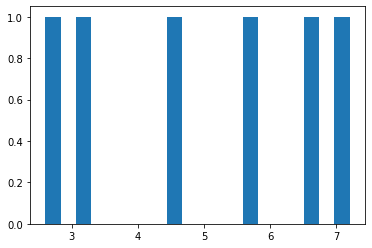

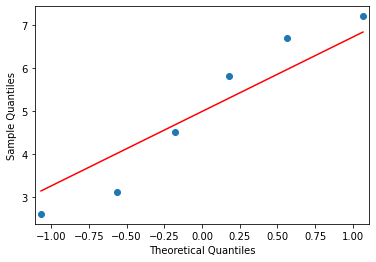

Grupo A - Estadística de prueba Shapiro-Wilk:  0.9267435669898987
Grupo A - Valor-p:  0.555199146270752
No hay una diferencia significativa en las medianas (no se rechaza H0)


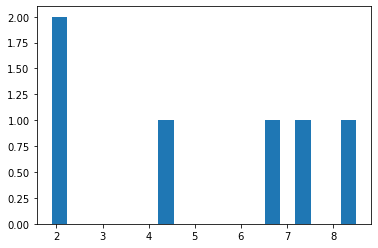

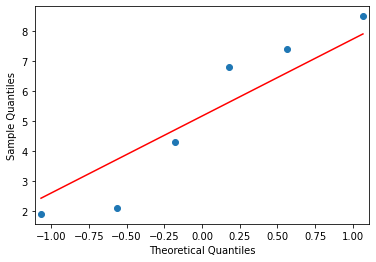

Grupo B - Estadística de prueba Shapiro-Wilk:  0.8947597146034241
Grupo B - Valor-p:  0.34388166666030884
No hay una diferencia significativa en las medianas (no se rechaza H0)


In [ ]:
grupo_a = data[data["Grupo"] == "A"]["Datos"]
grupo_b = data[data["Grupo"] == "B"]["Datos"]

# Prueba gráfica de normalidad
plt.hist(grupo_a, bins=20)
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(grupo_a, line='s')
plt.show()

# Prueba estadística de normalidad
stat, p = shapiro(grupo_a)
print('Grupo A - Estadística de prueba Shapiro-Wilk: ', stat)
print('Grupo A - Valor-p: ', p)

alpha = 0.05
if p > alpha:
    print('No hay una diferencia significativa en las medianas (no se rechaza H0)')
else:
    print('Hay una diferencia significativa en las medianas (se rechaza H0)')
# Prueba gráfica de normalidad
plt.hist(grupo_b, bins=20)
plt.show()

qqplot(grupo_b, line='s')
plt.show()

# Prueba estadística de normalidad
stat, p = shapiro(grupo_b)
print('Grupo B - Estadística de prueba Shapiro-Wilk: ', stat)
print('Grupo B - Valor-p: ', p)

alpha = 0.05
if p > alpha:
    print('No hay una diferencia significativa en las medianas (no se rechaza H0)')
else:
    print('Hay una diferencia significativa en las medianas (se rechaza H0)')


b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

In [ ]:
# Realizar la prueba de normalidad Mann-Whitney
stat, p = stats.mannwhitneyu(grupo_a, grupo_b)
print('Prueba de Mann-Whitney U:')
print('Estadístico de prueba =', stat)
print('valor p =', p)
alpha = 0.05
if p > alpha:
    print('No hay una diferencia significativa en las medianas (no se rechaza H0)')
else:
    print('Hay una diferencia significativa en las medianas (se rechaza H0)')

#La hipótesis nula de la prueba es que no hay diferencia significativa entre las medianas de ambos grupos.


Prueba de Mann-Whitney U:
Estadístico de prueba = 17.0
valor p = 0.9372294372294373
No hay una diferencia significativa en las medianas (no se rechaza H0)
